## HR Case Study Exploratory Data Analysis
    - The purpose of this notebook is to take the cleaned data and perform EDA as well as feature engineering

# Questions we want to answer in this notebook
- What does attrition look like for the various categorical variables, complete
- General time analysis of hours worked over the year, complete
- Job roles by gender, complete
- Monthly income for the various job roles, complete
- Which group had the highest percent salary hike, complete

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('fulldata2.csv')
data.head()

,Unnamed: 0,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked,FullName
0,0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944,Cristina Rivers
1,1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667,Beth Bush
2,2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167,Bradley Wright
3,3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444,Zachary Clark
4,4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778,Martin Stevens


In [4]:
# Checking data types
data.dtypes
# categary object types aren't carrying over so will have to manually change them over

object_to_cat = data.select_dtypes(include='object').columns
data[object_to_cat] = data[object_to_cat].astype('category')
data['FullName'] = data['FullName'].astype('str') #keeps full name as string not category
data.dtypes

Unnamed: 0                    int64
EmployeeID                    int64
Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                     int64
EducationField             category
EmployeeCount                 int64
Gender                     category
JobLevel                      int64
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            int64
Over18                     category
PercentSalaryHike             int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction       int64
JobSatisfaction               int64
WorkLifeBalance             

In [5]:
# What does attrition look like for the various categorical variables

categoricaldata = data.select_dtypes(include='category').columns
categoricaldata

catdata = data[categoricaldata]
catdata

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y
...,...,...,...,...,...,...,...,...
4405,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y
4406,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y
4407,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
4408,No,Travel_Rarely,Sales,Medical,Male,Laboratory Technician,Divorced,Y


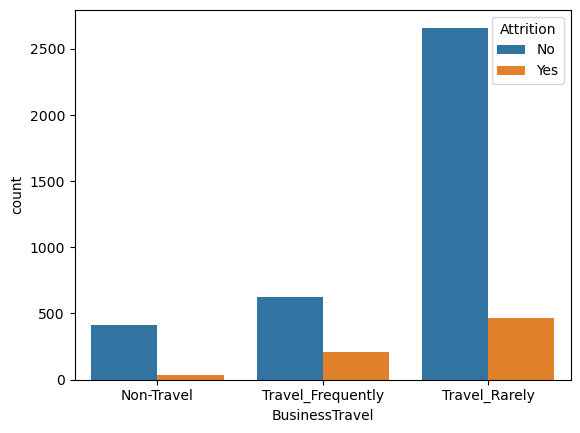

In [6]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=catdata)
plt.show()

#Those that rarely travel

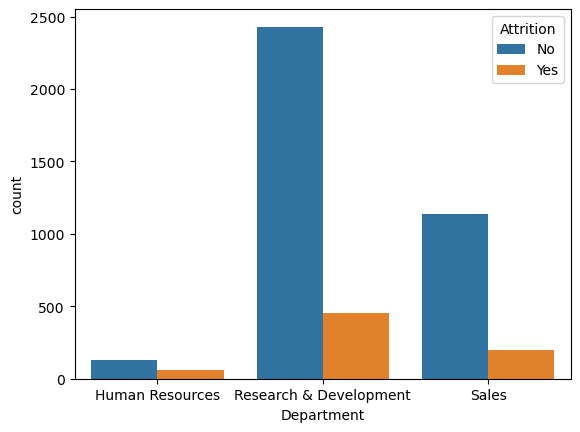

In [7]:
sns.countplot(x='Department', hue='Attrition', data=catdata)
plt.show()

# Those that are in Research and Development

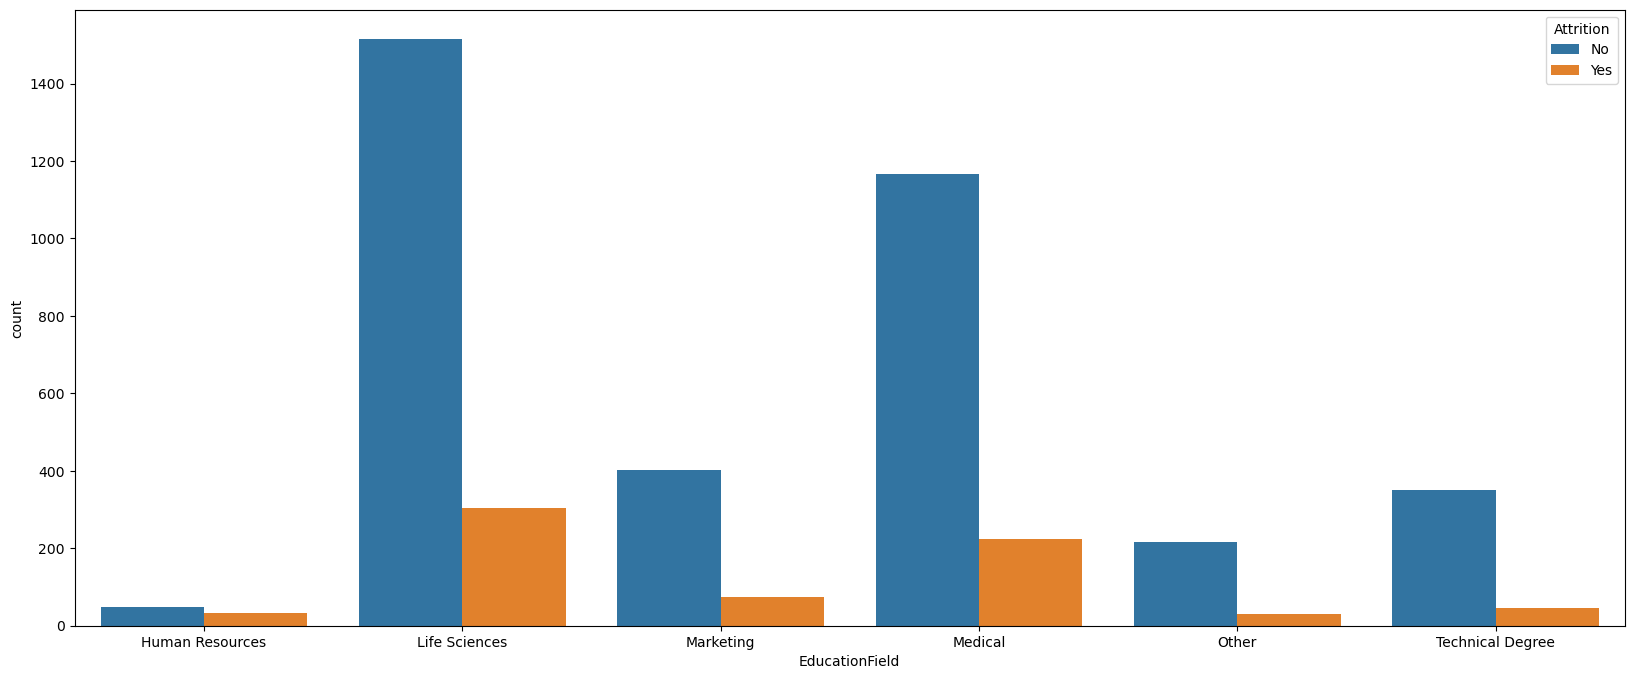

In [8]:
plt.figure(figsize=(20, 8))
sns.countplot(x='EducationField', hue='Attrition', data=catdata)
plt.show()

# Those that majored in life sciences

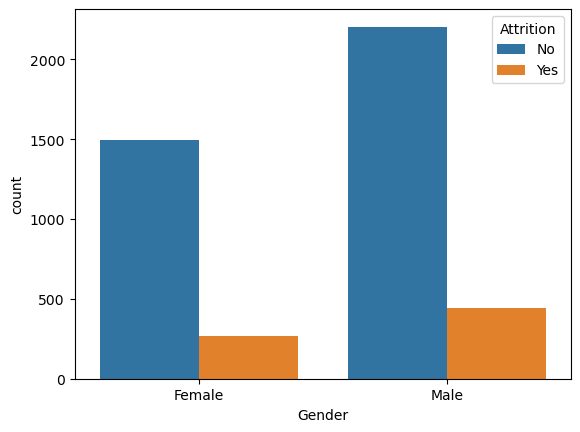

In [9]:
sns.countplot(x='Gender', hue='Attrition', data=catdata)
plt.show()

# Males

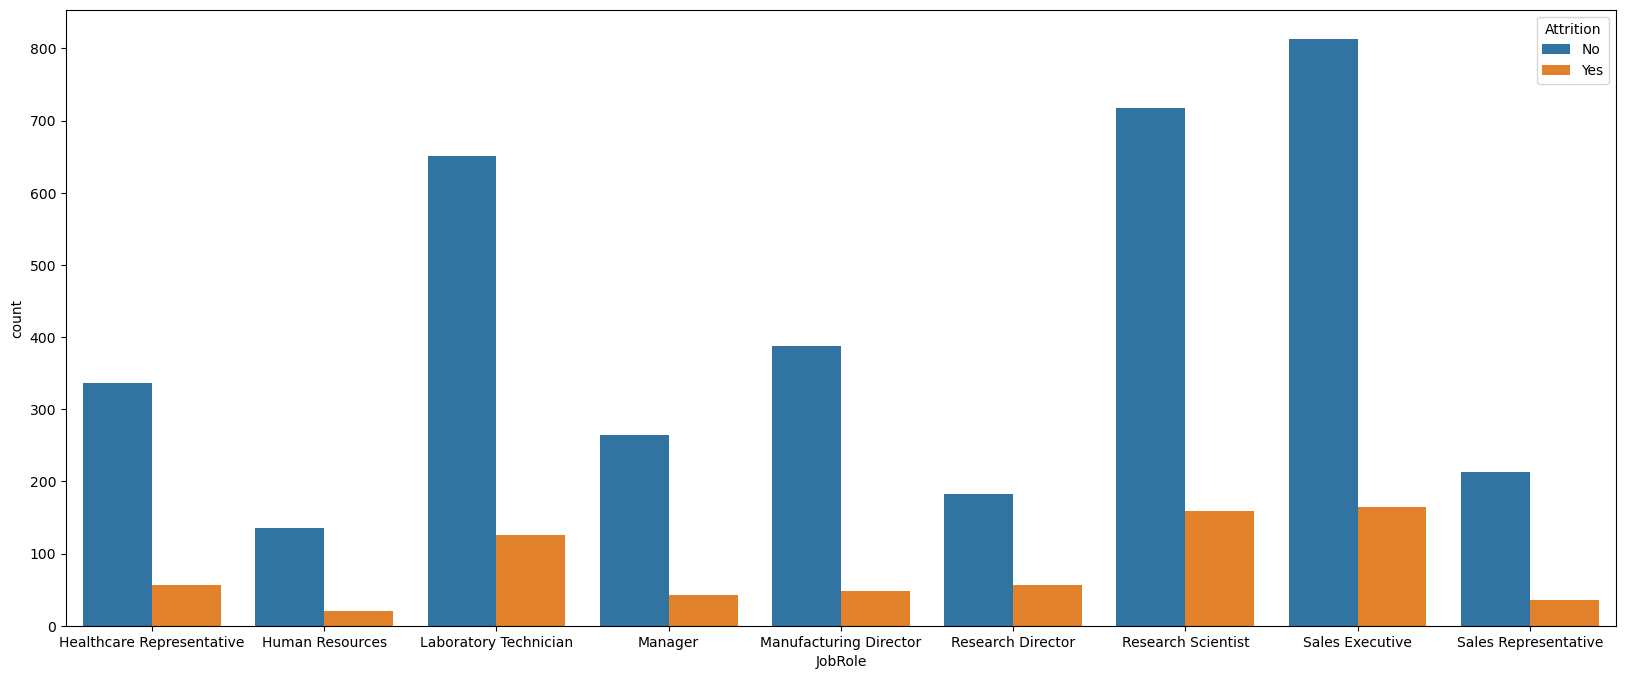

In [10]:
plt.figure(figsize=(20, 8))
sns.countplot(x='JobRole', hue='Attrition', data=catdata)
plt.show()

#Top three are Sales executives, research scientists, and labratroy technicians

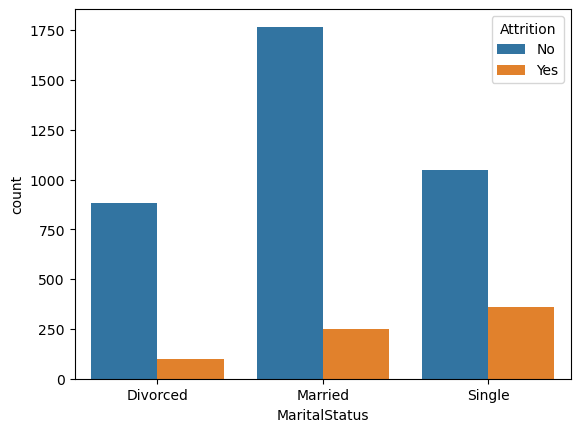

In [11]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=catdata)
plt.show()

# Those that are single

Top individuals of attrition by category
- Those that travel rarely
- Those in the research and development program
- Those that majored in life sciences
- Males
- Top three positions for attrition are sales executives, research scientists, and labratroy technicians
- Those that are single

Average Monthly Salary by Department

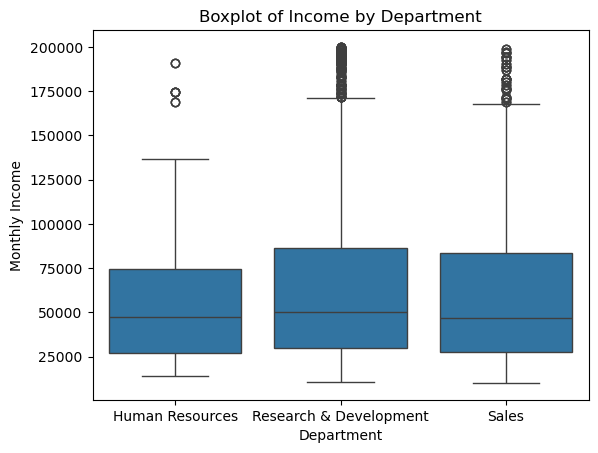

In [12]:
sns.boxplot(x='Department', y='MonthlyIncome', data=data)

plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.title('Boxplot of Income by Department')

plt.show()

# R&D have the highest median monthly salary

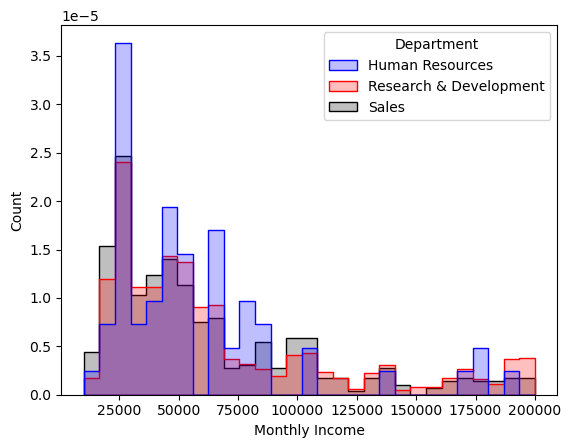

In [13]:
custom_palette = ['blue', 'red', 'black']
sns.histplot(data=data, x='MonthlyIncome', hue='Department', element='step', stat='density', common_norm=False, palette=custom_palette)

plt.xlabel('Monthly Income')
plt.ylabel('Count')

plt.show()

I need to look at a break down of cumulative and average hours worked by month

In [14]:
#Data for month plot
month_worked_comp = data[['EmployeeID','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
month_worked_comp

melted_monthly_work = pd.melt(month_worked_comp, id_vars='EmployeeID', var_name='Month', value_name='Hours_Worked')



melted_cumulative = melted_monthly_work.groupby('Month')['Hours_Worked'].sum().reset_index()
melted_average = melted_monthly_work.groupby('Month')['Hours_Worked'].median().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

melted_cumulative['Month'] = pd.Categorical(melted_cumulative['Month'], categories=month_order, ordered=True)
melted_average['Month'] = pd.Categorical(melted_average['Month'], categories=month_order, ordered=True)

# Sort both DataFrames based on the 'Month' column order
melted_cumulative = melted_cumulative.sort_values('Month')
melted_average = melted_average.sort_values('Month')

# Reset the index if needed
melted_cumulative = melted_cumulative.reset_index(drop=True)
melted_average = melted_average.reset_index(drop=True)

In [15]:
melted_average

,Month,Hours_Worked
0,January,133.027778
1,February,141.062500
2,March,147.818194
3,April,154.895000
4,May,140.702361
5,June,154.783472
6,July,154.920000
7,August,147.978194
8,September,147.866528
9,October,147.340417


In [16]:
melted_cumulative

,Month,Hours_Worked
0,January,611674.093889
1,February,645599.654444
2,March,677331.810278
3,April,709892.035833
4,May,645441.026389
5,June,709212.230833
6,July,710877.594722
7,August,677981.978889
8,September,677575.507500
9,October,677153.850833


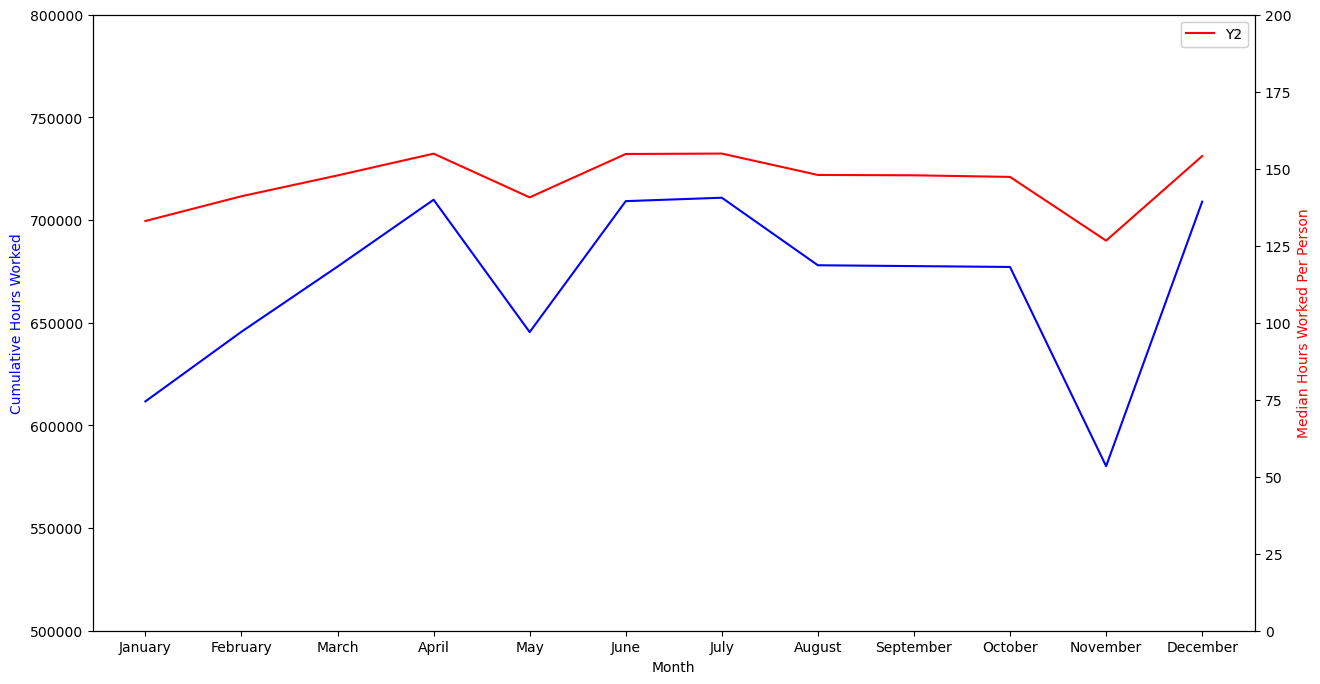

In [17]:
plt.figure(figsize=(15, 8))
# Creation of the plot

ax1 = sns.lineplot(x='Month', y='Hours_Worked', data=melted_cumulative, label='Y1', color='blue')

ax2 = ax1.twinx()

sns.lineplot(x='Month', y='Hours_Worked', data=melted_average, label='Y2', color='red', ax=ax2)

# Add labels and legend
ax1.set_xlabel('Month')
ax1.set_ylabel('Cumulative Hours Worked', color='blue')
ax2.set_ylabel('Median Hours Worked Per Person', color='red')

ax1.set_ylim(500000, 800000)
ax2.set_ylim(0, 200)

# Show the plot


plt.show()

In [18]:
data.head()
data.dtypes


Unnamed: 0                    int64
EmployeeID                    int64
Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                     int64
EducationField             category
EmployeeCount                 int64
Gender                     category
JobLevel                      int64
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            int64
Over18                     category
PercentSalaryHike             int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction       int64
JobSatisfaction               int64
WorkLifeBalance             

In [19]:
#We need to see which quantitative variable has the highest correlation to monthly salary and working years

#We need a subset of the  quant data first. 
quant_data = data[data.select_dtypes(include='int64').columns]
columns_take_out = ['EmployeeCount', 'StandardHours', 'Unnamed: 0']
quant_data = quant_data.drop(columns=columns_take_out)
quant_data.head()

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,6,2,1,131160,1,11,0,1,6,1,0,0,3,4,2,3,3
1,2,31,10,1,1,41890,0,23,1,6,3,5,1,4,3,2,4,2,4
2,3,32,17,4,4,193280,1,15,3,5,2,5,0,3,2,2,1,3,3
3,4,38,2,5,3,83210,3,11,3,13,5,8,7,5,4,4,3,2,3
4,5,32,10,1,1,23420,4,12,2,9,2,6,0,4,4,1,3,3,3


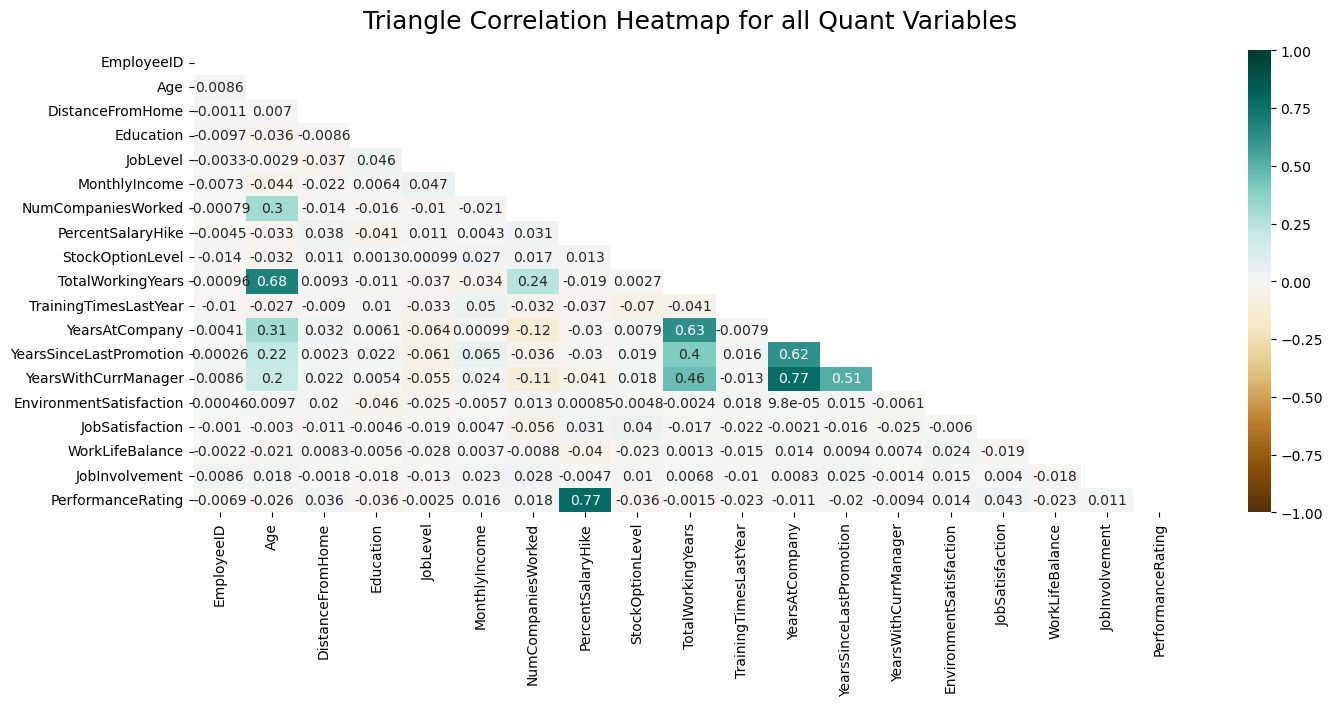

In [20]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(quant_data.corr()))
heatmap = sns.heatmap(quant_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap for all Quant Variables', fontdict={'fontsize':18}, pad=16);

Years at Company Correlations: 
- Years since last promotion (positive)
- Years with Current Manager (Positive)
- Age
- Total Working Years

Montlhy Inclome Correlations (Slightly)
- Training Times last year
- Years Since Last Promotion

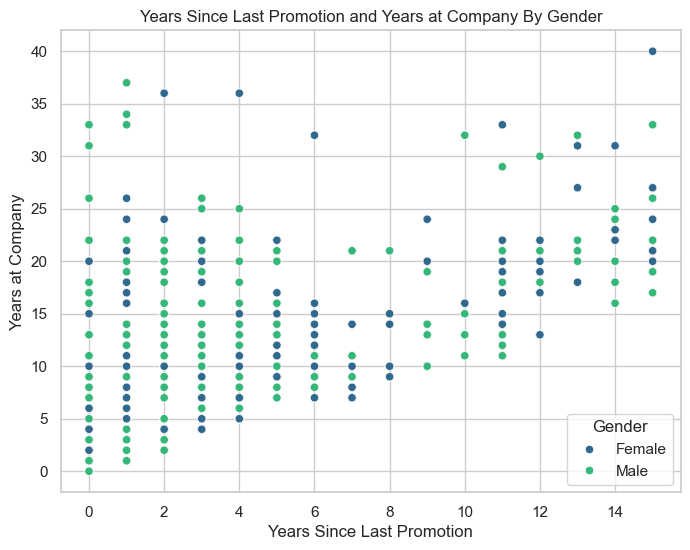

In [21]:
# Correlation Relationship example with 

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.scatterplot(x='YearsSinceLastPromotion', y='YearsAtCompany', hue='Gender', data=data, palette='viridis')

# Customize the plot
plt.title('Years Since Last Promotion and Years at Company By Gender')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years at Company')
plt.legend(title='Gender')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

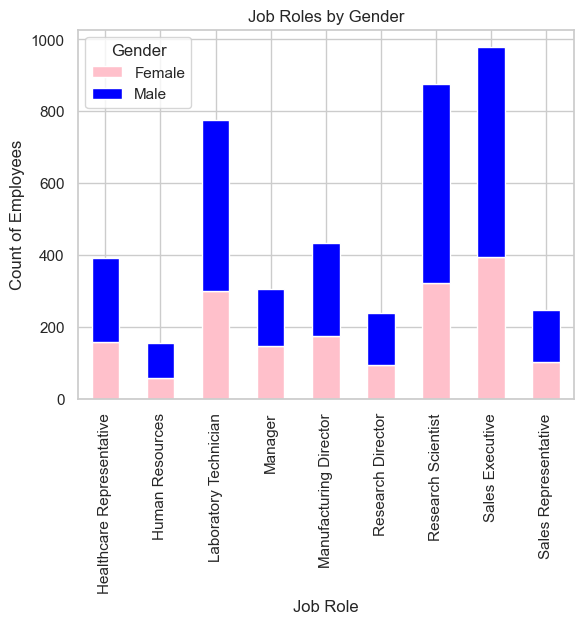

In [22]:
#Breakdown of Roles by gender

gender_role_pivot = pd.pivot_table(data, index='JobRole', values = 'EmployeeID', columns='Gender',aggfunc='count')


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

custom_cmap = ListedColormap(['pink', 'blue'])

gender_role_pivot.plot(kind='bar', stacked=True, colormap=custom_cmap)


plt.title('Job Roles by Gender')
plt.xlabel('Job Role')
plt.ylabel('Count of Employees')
plt.legend(title='Gender')

plt.show()

<Figure size 1000x600 with 0 Axes>

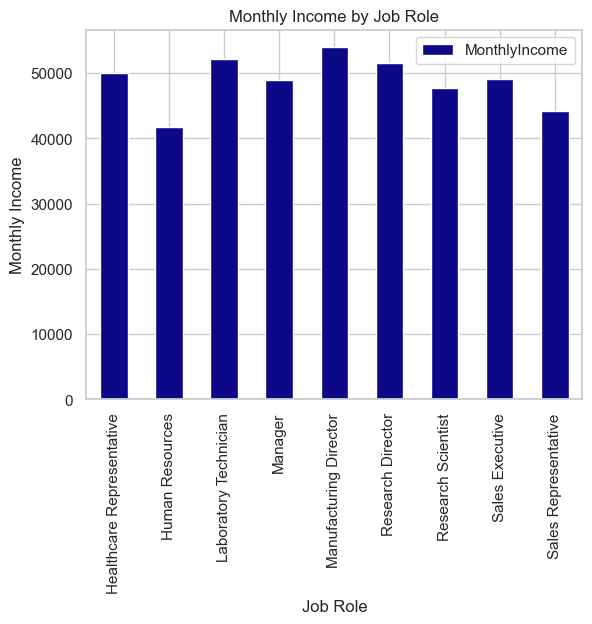

In [23]:
#breakdown of salary by role

role_salary_pvt = pd.pivot_table(data, index='JobRole', values = 'MonthlyIncome', aggfunc='median')


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


role_salary_pvt.plot(kind='bar', colormap='plasma')


plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')

plt.show()

# HR with the lowest median monthly income, manufacturing directors with the highest. 


<Figure size 1000x600 with 0 Axes>

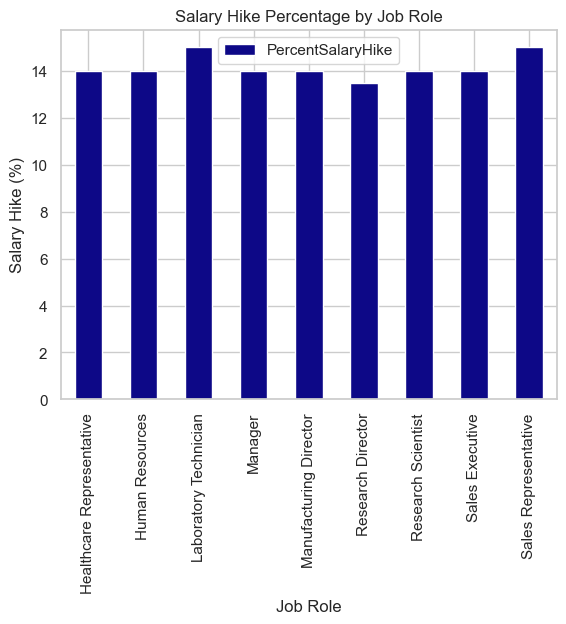

In [24]:
role_salary_pvt = pd.pivot_table(data, index='JobRole', values = 'PercentSalaryHike', aggfunc='median')


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


role_salary_pvt.plot(kind='bar', colormap='plasma')


plt.title('Salary Hike Percentage by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary Hike (%)')

plt.show()

# Research Director

Lowest Performing Employees

In [25]:
data.head()

,Unnamed: 0,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked,FullName
0,0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944,Cristina Rivers
1,1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667,Beth Bush
2,2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167,Bradley Wright
3,3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444,Zachary Clark
4,4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778,Martin Stevens


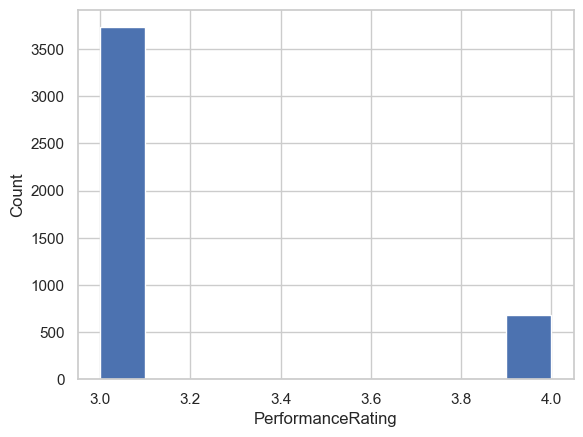

In [26]:
#Job performance distribution

plt.hist(data['PerformanceRating'])

plt.xlabel('PerformanceRating')
plt.ylabel('Count')

plt.show()

In [27]:
#export data for model creation

data.to_csv('dataformodel.csv')